In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/My Drive/DSL/Assingment1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DSL/Assingment1


In [ ]:

# Load the dataset
adult = pd.read_csv('adult.data', header=None, na_values=' ?')

adult.columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:

for col in adult.columns:
    print(f"Unique values for column '{col}': {adult[col].unique()}")

Unique values for column 'age': [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique values for column 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values for column 'fnlwgt': [ 77516  83311 215646 ...  34066  84661 257302]
Unique values for column 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values for column 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values for column 'marital-status': [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values

In [ ]:
# Count missing values in each column
missing_values = adult.isnull().sum()
missing_values

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


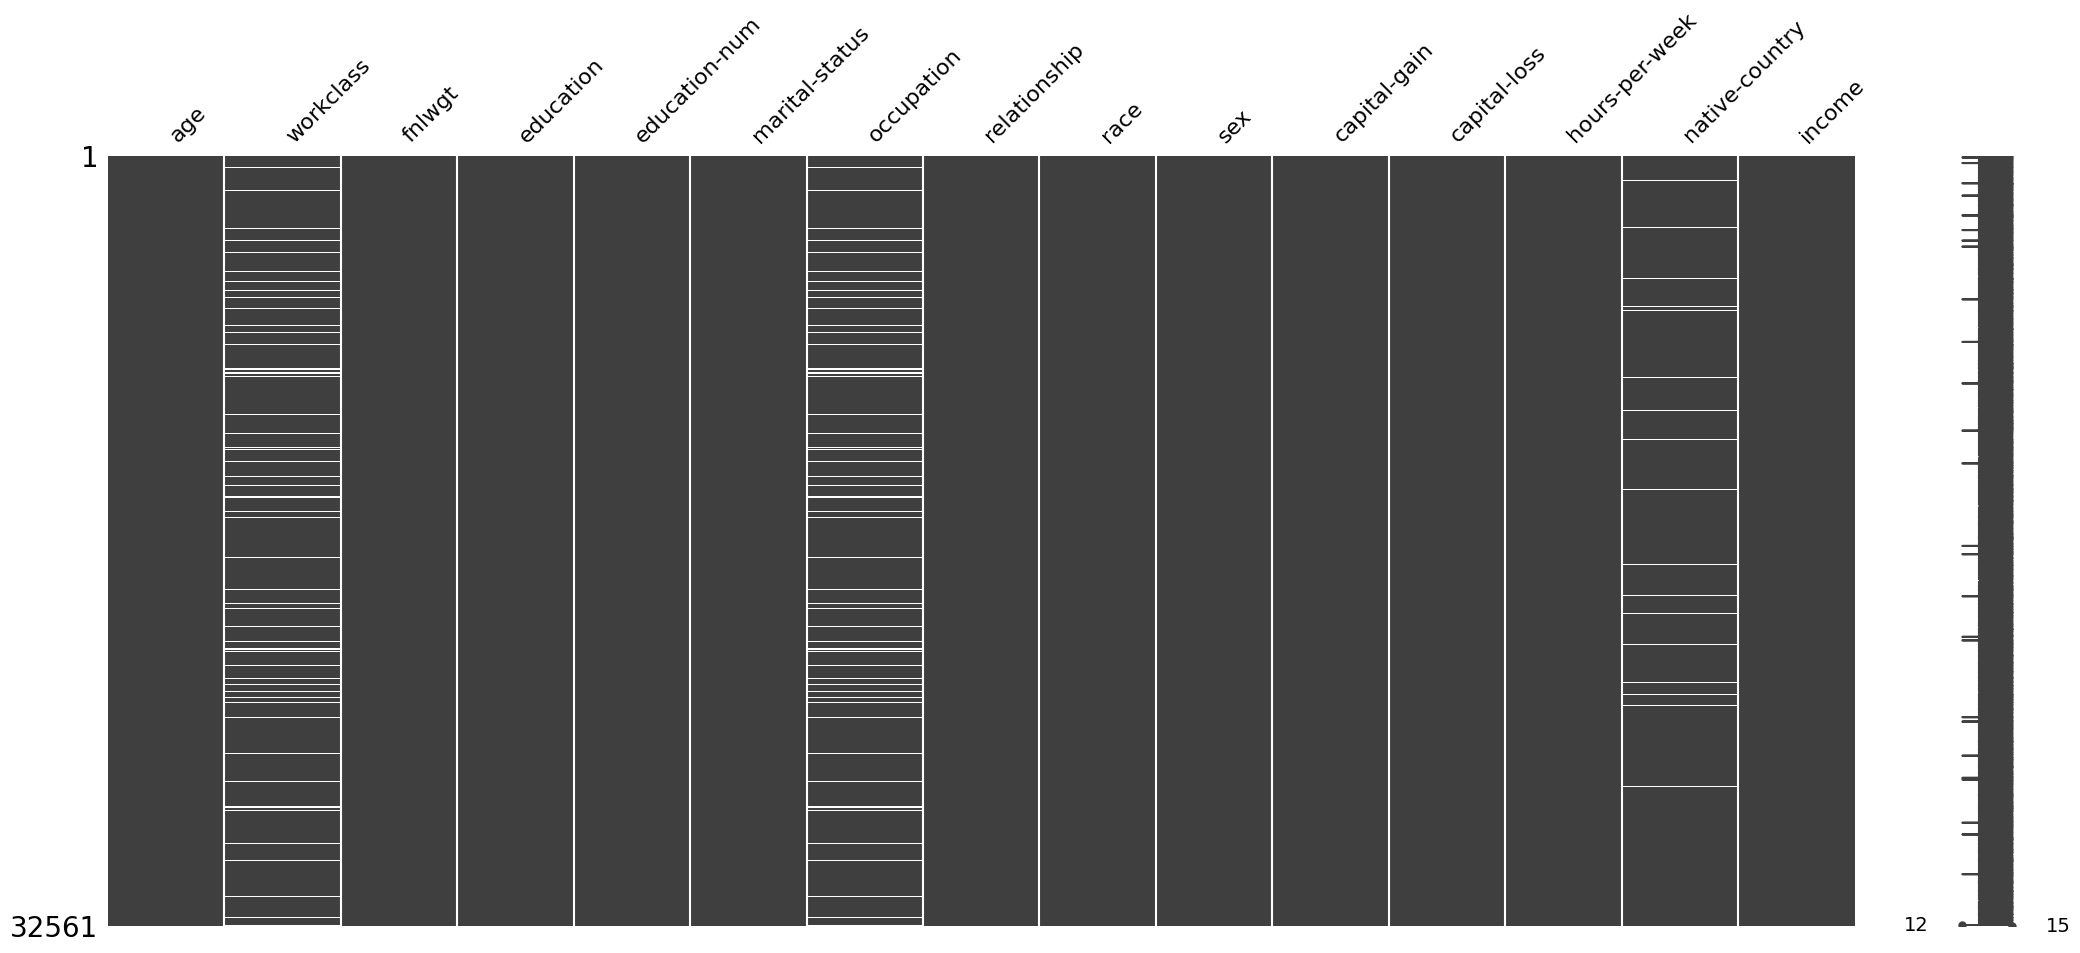

Missing values count:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


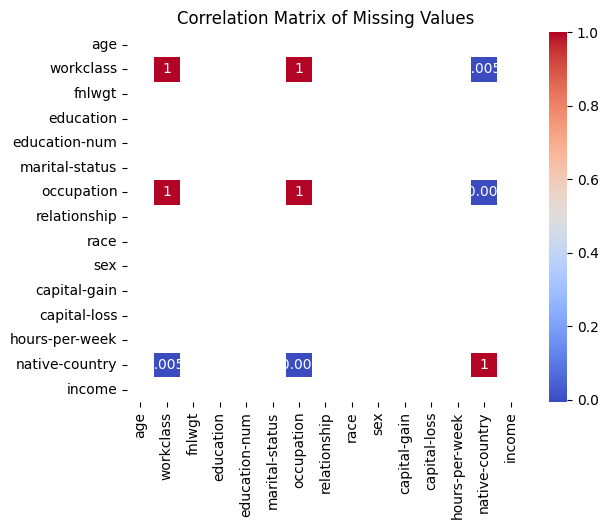


Testing Missingness for: workclass
Chi-Square Test between missingness in workclass and age: p-value=1.0
Chi-Square Test between missingness in workclass and fnlwgt: p-value=1.0
Chi-Square Test between missingness in workclass and education: p-value=1.0
Chi-Square Test between missingness in workclass and education-num: p-value=1.0
Chi-Square Test between missingness in workclass and marital-status: p-value=1.0
Chi-Square Test between missingness in workclass and occupation: p-value=0.0
--> Missingness in workclass is dependent on occupation (Potentially MAR or MNAR)
Chi-Square Test between missingness in workclass and relationship: p-value=1.0
Chi-Square Test between missingness in workclass and race: p-value=1.0
Chi-Square Test between missingness in workclass and sex: p-value=1.0
Chi-Square Test between missingness in workclass and capital-gain: p-value=1.0
Chi-Square Test between missingness in workclass and capital-loss: p-value=1.0
Chi-Square Test between missingness in workclas

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Visualizing missing values
msno.matrix(adult)
plt.show()

# Missing Data Pattern
print("Missing values count:\n", adult.isnull().sum())

# MCAR Test using Little's test is complex, so we'll use missing value randomness tests

# 1. Checking correlation between missing values
missing_adult = adult.isnull().astype(int)  # Convert missing values to 1s
correlation_matrix = missing_adult.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Missing Values")
plt.show()

# 2. MCAR Assumption: Missingness should be completely random
# We check if missingness in one variable is independent of others using Chi-Square test
def chi_square_missingness_test(adult, column):
    """Check if missingness in a column is independent of other variables using Chi-Square test."""
    for other_column in adult.columns:
        if column != other_column:
            observed = pd.crosstab(adult[column].isnull(), adult[other_column].isnull())
            chi2, p, dof, expected = chi2_contingency(observed)
            print(f"Chi-Square Test between missingness in {column} and {other_column}: p-value={p}")
            if p < 0.05:
                print(f"--> Missingness in {column} is dependent on {other_column} (Potentially MAR or MNAR)")

# Run Chi-Square tests for each column with missing values
for col in ["workclass", "occupation", "native-country"]:
    print(f"\nTesting Missingness for: {col}")
    chi_square_missingness_test(adult, col)

In [ ]:
# Count missing values in each column
missing_values = adult.isnull().sum()
missing_values

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:

### Step 1: Context-Aware Imputation for `native-country`
# Since native-country has the least missing values, we impute it first

# Compute the overall mode for `native-country`
overall_mode_country = adult["native-country"].mode()[0]

# Use related features to compute mode for each group
grouping_columns_country = ["race", "sex", "income"]
grouped_mode_country = adult.groupby(grouping_columns_country)["native-country"].agg(lambda x: x.mode()[0] if not x.mode().empty else overall_mode_country).to_dict()

# Function to impute native-country
def impute_native_country(row):
    if pd.isnull(row["native-country"]):
        key = tuple(row[col] for col in grouping_columns_country)
        return grouped_mode_country.get(key, overall_mode_country)
    return row["native-country"]

adult["native-country"] = adult.apply(impute_native_country, axis=1)

print(f"Missing 'native-country' values after imputation: {adult['native-country'].isnull().sum()}")

### Step 2: Context-Aware Imputation for `workclass`
# Now we can use `native-country` along with other categorical features

# Compute overall mode for `workclass`
overall_mode_workclass = adult["workclass"].mode()[0]

# Use `education`, `marital-status`, `native-country` for group-wise mode calculation
grouping_columns_workclass = ["education", "marital-status", "native-country", "relationship", "sex", "income"]
grouped_mode_workclass = adult.groupby(grouping_columns_workclass)["workclass"].agg(lambda x: x.mode()[0] if not x.mode().empty else overall_mode_workclass).to_dict()

# Function to impute workclass
def impute_workclass(row):
    if pd.isnull(row["workclass"]):
        key = tuple(row[col] for col in grouping_columns_workclass)
        return grouped_mode_workclass.get(key, overall_mode_workclass)
    return row["workclass"]

adult["workclass"] = adult.apply(impute_workclass, axis=1)

print(f"Missing 'workclass' values after imputation: {adult['workclass'].isnull().sum()}")

### Step 3: Context-Aware Imputation for `occupation`
# Now that both `native-country` and `workclass` are imputed, we use them for occupation

# Compute overall mode for `occupation`
overall_mode_occupation = adult["occupation"].mode()[0]

# Use `workclass`, `education`, `marital-status`, `relationship`, `sex`, `income` for group-wise mode calculation
grouping_columns_occupation = ["workclass", "education", "marital-status", "relationship", "sex", "income", "native-country"]
grouped_mode_occupation = adult.groupby(grouping_columns_occupation)["occupation"].agg(lambda x: x.mode()[0] if not x.mode().empty else overall_mode_occupation).to_dict()

# Function to impute occupation
def impute_occupation(row):
    if pd.isnull(row["occupation"]):
        key = tuple(row[col] for col in grouping_columns_occupation)
        return grouped_mode_occupation.get(key, overall_mode_occupation)
    return row["occupation"]

adult["occupation"] = adult.apply(impute_occupation, axis=1)

print(f"Missing 'occupation' values after imputation: {adult['occupation'].isnull().sum()}")

# Final check for missing values
print("\nFinal Missing Values Count:\n", adult.isnull().sum())

Missing 'native-country' values after imputation: 0
Missing 'workclass' values after imputation: 0
Missing 'occupation' values after imputation: 0

Final Missing Values Count:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
adult.shape

(32561, 15)

In [ ]:

# Display basic statistics for numerical features.
print(adult.describe())

# Display the number of unique values and their frequencies for categorical features.
for col in adult.select_dtypes(include=['object']).columns:
  print(f"\nColumn: {col}")
  print(adult[col].value_counts())


# Example: Cross-tabulation between education and income
print("\nCross-tabulation between education and income:")
print(pd.crosstab(adult['education'], adult['income']))

# Example: Grouped statistics
print("\nAverage hours per week by income level:")
print(adult.groupby('income')['hours-per-week'].mean())


# Example: Correlation matrix for numerical features.
numerical_features = adult.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix for Numerical Features:\n", correlation_matrix)

#You can further explore relationships between features using visualization techniques.

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Column: workclass
workclass
Private             24513
Self-emp

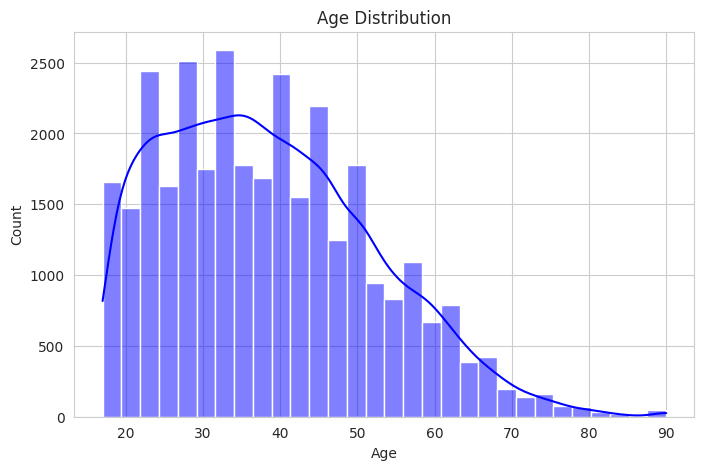

<ipython-input-31-16850808db7c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult["workclass"], order=adult["workclass"].value_counts().index, palette="viridis")


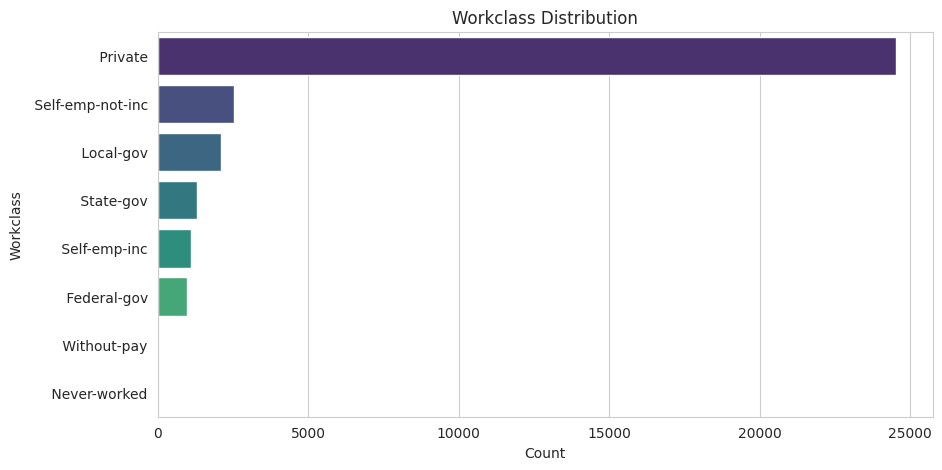

<ipython-input-31-16850808db7c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult["education"], order=adult["education"].value_counts().index, palette="coolwarm")


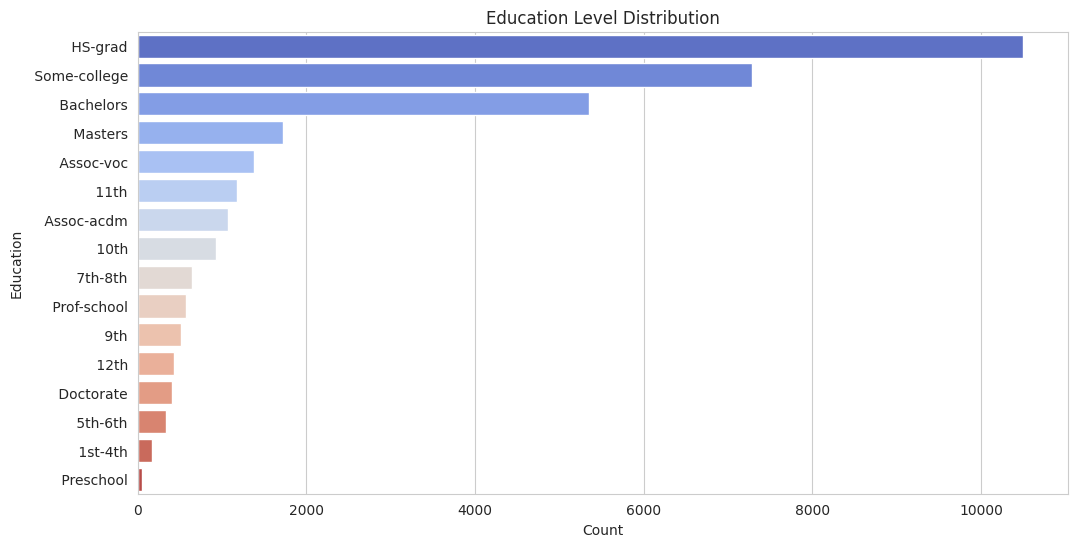

<ipython-input-31-16850808db7c>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult["marital-status"], order=adult["marital-status"].value_counts().index, palette="Blues_r")


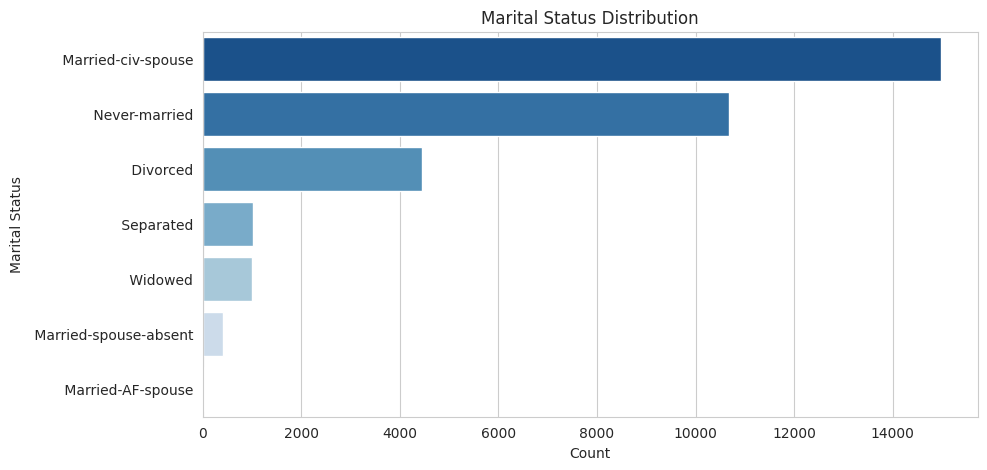

<ipython-input-31-16850808db7c>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult["occupation"], order=adult["occupation"].value_counts().index, palette="magma")


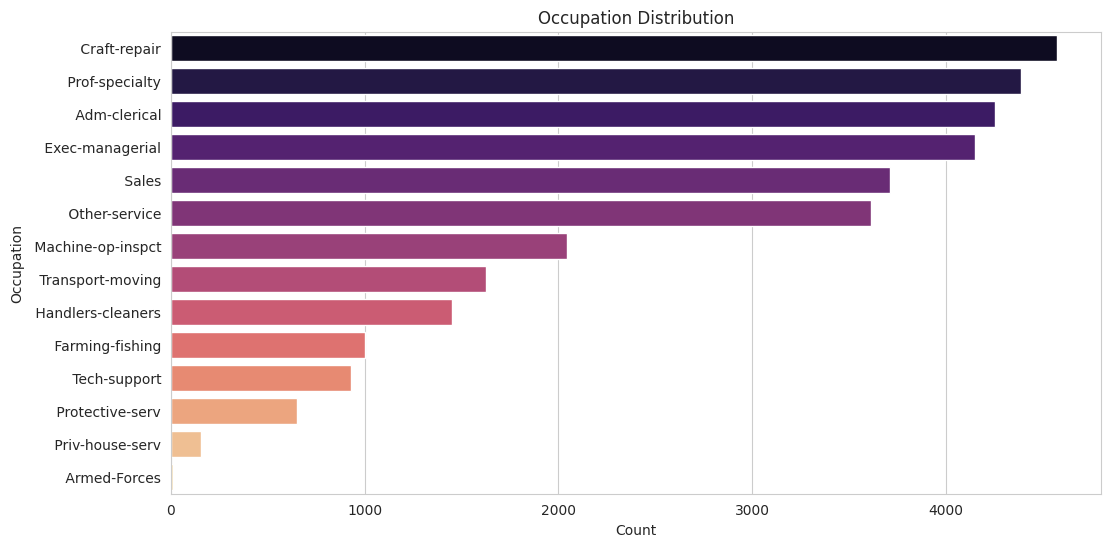

<ipython-input-31-16850808db7c>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=adult["income"], palette="Set1")


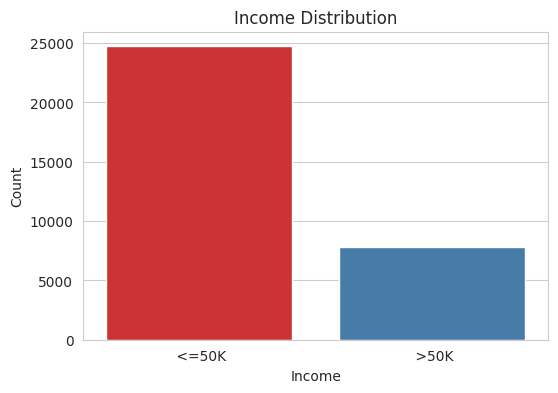

<ipython-input-31-16850808db7c>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=adult["income"], y=adult["hours-per-week"], palette="Set2")


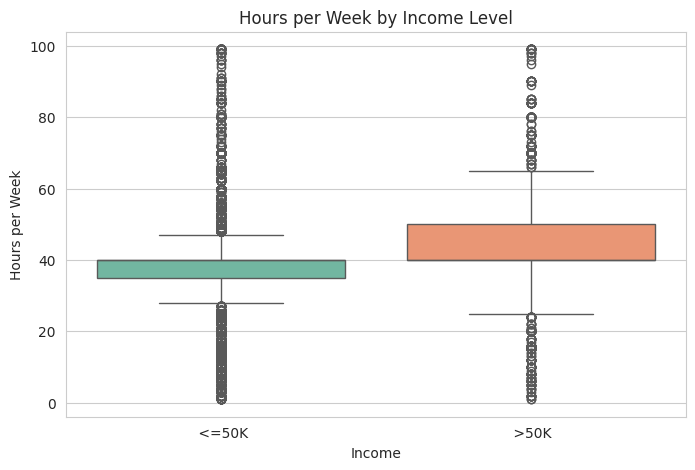

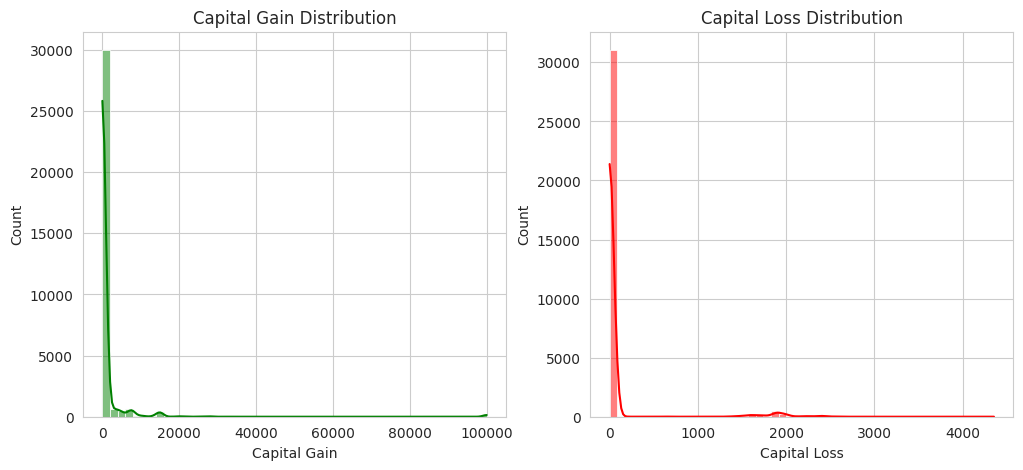

<ipython-input-31-16850808db7c>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=adult["race"], order=adult["race"].value_counts().index, palette="pastel")


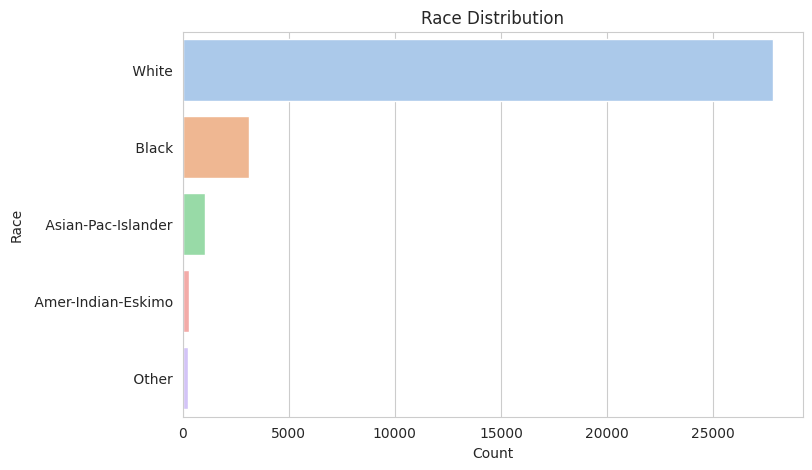

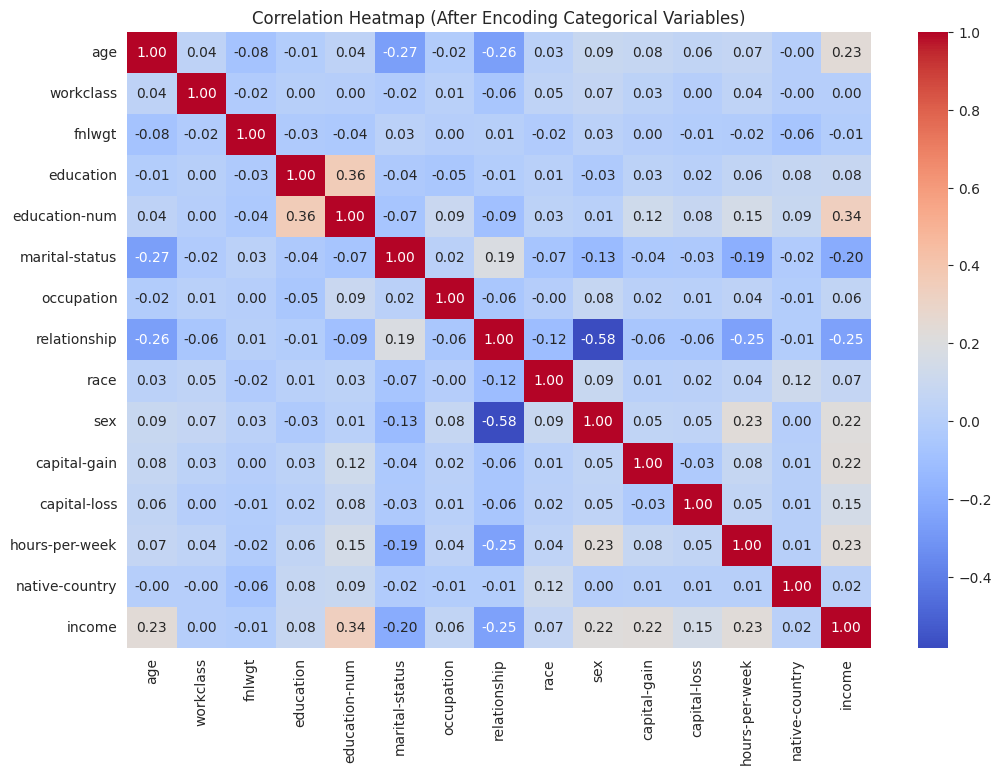

In [ ]:
# Set seaborn style
sns.set_style("whitegrid")

# Plot 1: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(adult["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot 2: Workclass Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=adult["workclass"], order=adult["workclass"].value_counts().index, palette="viridis")
plt.title("Workclass Distribution")
plt.xlabel("Count")
plt.ylabel("Workclass")
plt.show()

# Plot 3: Education Level Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=adult["education"], order=adult["education"].value_counts().index, palette="coolwarm")
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()

# Plot 4: Marital Status Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=adult["marital-status"], order=adult["marital-status"].value_counts().index, palette="Blues_r")
plt.title("Marital Status Distribution")
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.show()

# Plot 5: Occupation Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=adult["occupation"], order=adult["occupation"].value_counts().index, palette="magma")
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()

# Plot 6: Income Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=adult["income"], palette="Set1")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Plot 7: Hours per Week by Income
plt.figure(figsize=(8, 5))
sns.boxplot(x=adult["income"], y=adult["hours-per-week"], palette="Set2")
plt.title("Hours per Week by Income Level")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

# Plot 8: Capital Gain and Capital Loss Distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(adult["capital-gain"], bins=50, kde=True, color="green", ax=ax[0])
ax[0].set_title("Capital Gain Distribution")
ax[0].set_xlabel("Capital Gain")

sns.histplot(adult["capital-loss"], bins=50, kde=True, color="red", ax=ax[1])
ax[1].set_title("Capital Loss Distribution")
ax[1].set_xlabel("Capital Loss")

plt.show()

# Plot 9: Race Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y=adult["race"], order=adult["race"].value_counts().index, palette="pastel")
plt.title("Race Distribution")
plt.xlabel("Count")
plt.ylabel("Race")
plt.show()

# Convert categorical variables to numerical for correlation matrix
adult_encoded = adult.copy()
categorical_columns = adult.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    adult_encoded[col] = adult_encoded[col].astype("category").cat.codes  # Convert categories to numeric codes

# Plot 10: Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(adult_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (After Encoding Categorical Variables)")
plt.show()